# COGS 118B - Final Project

# Insert title here

## Group members

- Daniel Kong
- Jonathan Ito
- Uri Reyes
- Larry Nguyen
- Fatima Dong

# Abstract 
Our goal is to see if we can accurately predict songs' genres using text analysis on the lyrics. The data, in addition to the lyrics of top spotify songs, represents different aspects of a song, such as how many words are spoken, what kinds of instrumentals, or the energy levels. All of these said columns have decimal values that correspond to different levels for each song aspect. For example, a higher value (closer to 1) on the speechiness column indicates more spoken words. Regarding the lyrics, we will be performing text analysis, we will be performing PCA on the other labels that represent aspects of a song and see which ones correlate the strongest to a song's genre. We will measure our performance/success using clustering to see how accurate our predictions of song genres are.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Cleaning and Standardizing the Data

- Making sure everything is uniform and up to standard for analysis

In [1]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 469.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 21.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Some useful imports

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans
import pandas as pd
import string

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fatimadong/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fatimadong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
data = pd.read_csv("spotify_songs.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_songs.csv'


Drop the columns that are not necessary to analyze


In [20]:
cols_to_drop = ["track_id", "playlist_id", "track_album_id"]
data = data.drop(cols_to_drop, axis = 1)

In [21]:
data.columns

Index(['track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'language'],
      dtype='object')

### Standardize the Data

Standardizing the data in our case is making the data easier to read and the dataset more understandable. Our methods of standardizing includes:

- Change the length of the songs from milliseconds into format that is in  Minutes: seconds
- Change the mode values so that 1 reads as "major" and 0 reads as "minor" as the dataset creators describe
- Change the key values of tracks to strings of their actual keys rather than integers that represent the keys
- Z-score numerical data to make all data be on the same order of magnitude.

In [22]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


In [23]:
type(data['key'].iloc[0])

numpy.int64

In [24]:
def standardize_duration(duration):
    total_seconds = duration / 1000
    minutes = int(total_seconds / 60)
    seconds = int(total_seconds % 60)
    str_seconds = str(seconds)
    if len(str_seconds) < 2:
        str_seconds = "0" + str_seconds
    return str(minutes) + ":" + str_seconds

def standardize_mode(mode):
    if (mode == 1):
        return 'Major'
    else:
        return 'minor'

def standardize_keys(key):
    key_dict = {0: 'C', 1: 'C sharp / D minor', 2: 'D', 3: 'E minor / D sharp', 4: 'E', 5: 'F', 6: 'F Sharp / G Flat', 7: 'G', 8: 'G Sharp / A Flat', 9: 'A', 10: 'A Sharp / B Flat', 11: 'B'}
    return key_dict[key]

In [25]:
data = data.rename(columns={"duration_ms": "track_length"})
data['track_length'] = data['track_length'].apply(standardize_duration)
data['key'] = data['key'].apply(standardize_keys)

In [26]:
data['mode'] = data['mode'].apply(standardize_mode)

In [27]:
#Use this cell to apply the standardize_key() function to the respective column

In [28]:
data.head()

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_length,language
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,2001-01-01,Pinoy Classic Rock,rock,classic rock,0.682,...,-10.068,Major,0.0236,0.27900,0.01170,0.0887,0.566,97.091,3:55,tl
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,Major,0.0442,0.01170,0.00994,0.3470,0.404,135.225,6:13,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,minor,0.2160,0.00432,0.00723,0.4890,0.650,111.904,4:22,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,-5.819,minor,0.0341,0.68900,0.00000,0.0664,0.405,118.593,4:03,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,Major,0.0409,0.03700,0.00000,0.1380,0.240,130.018,3:13,en


Z-score all of the numerical data

In [38]:
# initialize the scaler
scaler = StandardScaler()

columns_to_standardize = ['track_popularity', 
                         'danceability',
                         'energy',
                         'loudness', 
                         'speechiness',
                         'acousticness',
                         'instrumentalness',
                         'liveness',
                         'valence',
                         'tempo']

data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
standardized_data.describe()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,18454.000,18454.000,18454.000,18454.000,18454.000,18454.000,18454.000,18454.000,18454.000,18454.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.724,-3.635,-3.740,-9.420,-0.819,-0.805,-0.304,-1.172,-2.276,-3.034
25%,-0.749,-0.653,-0.660,-0.507,-0.650,-0.731,-0.304,-0.630,-0.768,-0.796
50%,0.226,0.106,0.126,0.186,-0.449,-0.429,-0.304,-0.401,0.006,-0.028
75%,0.795,0.739,0.790,0.702,0.233,0.361,-0.294,0.367,0.784,0.550
max,2.338,2.232,1.704,2.754,7.936,3.750,5.562,5.245,2.057,3.380


Change it to only songs in English since we are utilizing Natural Language Processing. Then drop the column since all the songs are in the same language, it is not necessary to keep

In [40]:
data = data[data['language'] == 'en']
data = data.drop(columns = ['language'])
data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_length
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",-0.587,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,-2.273,...,A,0.695,Major,-0.606,-0.751,-0.245,1.024,-0.510,0.522,6:13
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",-1.724,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,1.339,...,F Sharp / G Flat,-0.252,minor,1.074,-0.785,-0.261,1.947,0.566,-0.323,4:22
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,-0.058,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,-1.460,...,F,0.325,minor,-0.705,2.358,-0.304,-0.801,-0.505,-0.080,4:03
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,0.917,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.773,...,A,1.635,Major,-0.638,-0.635,-0.304,-0.336,-1.227,0.334,3:13
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",1.120,Chapters,2019-04-26,urban contemporary,r&b,urban contemporary,-0.987,...,F Sharp / G Flat,0.210,Major,-0.500,0.481,-0.304,-0.599,-0.943,0.977,3:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",1.201,NAV,2017-02-24,PROJECT: Contemporary,r&b,urban contemporary,0.666,...,C,0.228,Major,2.393,-0.341,-0.304,-0.635,-0.790,1.238,2:59
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",-1.724,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,edm,progressive electro house,-1.100,...,A Sharp / B Flat,0.339,minor,-0.180,-0.780,-0.304,0.946,-1.354,0.261,3:28
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",0.267,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,pop,electropop,2.125,...,D,0.187,Major,0.722,-0.496,-0.304,0.159,0.553,0.333,4:20
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",-0.099,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,r&b,neo soul,-1.240,...,F,0.107,minor,-0.774,2.478,-0.302,-0.485,0.596,0.776,3:11


Let's just create a dataframe of lyrics and song names to separate the data in an organized manner to perform text analysis on the lyrics

In [41]:
lyrics = data[['track_name', 'lyrics', 'playlist_subgenre']]
lyrics

,track_name,lyrics,playlist_subgenre
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",hard rock
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,neo soul
4,Dumb Litty,Get up out of my business You don't keep me fr...,dance pop
5,Soldier,"Hold your breath, don't look down, keep trying...",urban contemporary
...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",urban contemporary
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",progressive electro house
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",electropop
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",neo soul


Let's add a column with the unique words of each song. In other words, each song's value for "unique words" is a list of each unique, non-repeated word in the song. 

In [42]:
type(lyrics['lyrics'].iloc[0])

str

In [43]:
def unique_words(words):
    lyrics_list = words.split(" ")
    unique = []
    for word in lyrics_list:
        if ',' in word:
            word = word[:-1]
        if word.lower() not in unique:
            unique.append(word.lower())

    return unique

In [44]:
unique = lyrics['lyrics'].apply(unique_words)

lyrics.loc[:, 'unique_words'] = unique
lyrics

C:\Users\itojo\AppData\Local\Temp\ipykernel_27536\461977818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'unique_words'] = unique


,track_name,lyrics,playlist_subgenre,unique_words
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",hard rock,"[the, trees, are, singing, in, wind, sky, blue..."
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing,"[na, yeah, spyderman, and, freeze, in, full, e..."
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,neo soul,"[i, really, can't, stay, baby, it's, cold, out..."
4,Dumb Litty,Get up out of my business You don't keep me fr...,dance pop,"[get, up, out, of, my, business, you, don't, k..."
5,Soldier,"Hold your breath, don't look down, keep trying...",urban contemporary,"[hold, your, breath, don't, look, down, keep, ..."
...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",urban contemporary,"[yeah, nah, if, i'ma, talk, keep, it, real, me..."
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",progressive electro house,"[caught, up, in, such, a, head, rush, wide-eye..."
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",electropop,"[my, anaconda, don't, want, none, unless, you,..."
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",neo soul,"[bound, to, fall, in, love, you, started, with..."


Now let's remove our stop words. A lot of the lyrics are different so we shall start with some basic stop words such as 'and', 'an', 'the', and other basic words used in almost every english sentence

In [45]:
custom_stop_words = ['and', 'an', 'of', 'to', 'in', 'of', 'with', 'for', 'as', 'at', 'that', 'this', 'is', 'are', 'was', 'were', 'be', 
                    'would', 'will', 'could', 'should', 'a', 'by']

for index, row in lyrics.iterrows():
    unique_words = row['unique_words']
    no_stop_words = [word for word in unique_words if word not in custom_stop_words]
    lyrics.at[index, 'unique_words'] = no_stop_words

lyrics

,track_name,lyrics,playlist_subgenre,unique_words
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",hard rock,"[the, trees, singing, wind, sky, blue, only, i..."
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing,"[na, yeah, spyderman, freeze, full, effect, uh..."
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,neo soul,"[i, really, can't, stay, baby, it's, cold, out..."
4,Dumb Litty,Get up out of my business You don't keep me fr...,dance pop,"[get, up, out, my, business, you, don't, keep,..."
5,Soldier,"Hold your breath, don't look down, keep trying...",urban contemporary,"[hold, your, breath, don't, look, down, keep, ..."
...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",urban contemporary,"[yeah, nah, if, i'ma, talk, keep, it, real, me..."
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",progressive electro house,"[caught, up, such, head, rush, wide-eyed, late..."
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",electropop,"[my, anaconda, don't, want, none, unless, you,..."
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",neo soul,"[bound, fall, love, you, started, mere, hello,..."


Now let's convert each list of unique words, without stop words, back into strings so that we can perform sentiment analysis on these unique words in contrast to the raw lyrics themselves

In [46]:
for i in range(len(np.array(lyrics['unique_words']))):
    " ".join(lyrics['unique_words'].iloc[i])

Now let's perform sentiment analysis on the unique words using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [47]:
negative = []
positive = []
neutral = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate through each song's lyrics and append their respective scores to the dataframe

for i in range(len(lyrics['lyrics'])):
    scores = sid.polarity_scores(lyrics['lyrics'].iloc[i])
    negative.append(scores['neg'])
    positive.append(scores['pos'])
    neutral.append(scores['neu'])
    compound.append(scores['compound'])

lyrics.loc[:, 'positive'] = positive
lyrics.loc[:, 'negative'] = negative
lyrics.loc[:, 'neutral'] = neutral
lyrics.loc[:, 'compound'] = compound

lyrics

C:\Users\itojo\AppData\Local\Temp\ipykernel_27536\2306971909.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'positive'] = positive
C:\Users\itojo\AppData\Local\Temp\ipykernel_27536\2306971909.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'negative'] = negative
C:\Users\itojo\AppData\Local\Temp\ipykernel_27536\2306971909.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,track_name,lyrics,playlist_subgenre,unique_words,positive,negative,neutral,compound
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",hard rock,"[the, trees, singing, wind, sky, blue, only, i...",0.294,0.036,0.670,0.987
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing,"[na, yeah, spyderman, freeze, full, effect, uh...",0.138,0.073,0.789,0.982
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,neo soul,"[i, really, can't, stay, baby, it's, cold, out...",0.112,0.083,0.805,0.759
4,Dumb Litty,Get up out of my business You don't keep me fr...,dance pop,"[get, up, out, my, business, you, don't, keep,...",0.051,0.363,0.586,-0.999
5,Soldier,"Hold your breath, don't look down, keep trying...",urban contemporary,"[hold, your, breath, don't, look, down, keep, ...",0.175,0.138,0.687,0.955
...,...,...,...,...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",urban contemporary,"[yeah, nah, if, i'ma, talk, keep, it, real, me...",0.107,0.185,0.708,-0.956
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",progressive electro house,"[caught, up, such, head, rush, wide-eyed, late...",0.119,0.068,0.813,0.922
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",electropop,"[my, anaconda, don't, want, none, unless, you,...",0.051,0.205,0.744,-0.999
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",neo soul,"[bound, fall, love, you, started, mere, hello,...",0.208,0.000,0.792,0.986


A better way to visualize the results is to plot the songs and their Sentiment Scores on a scatter plot. Here we will be plotting the song's respective positive and negative scores for each lyric grouped by genre

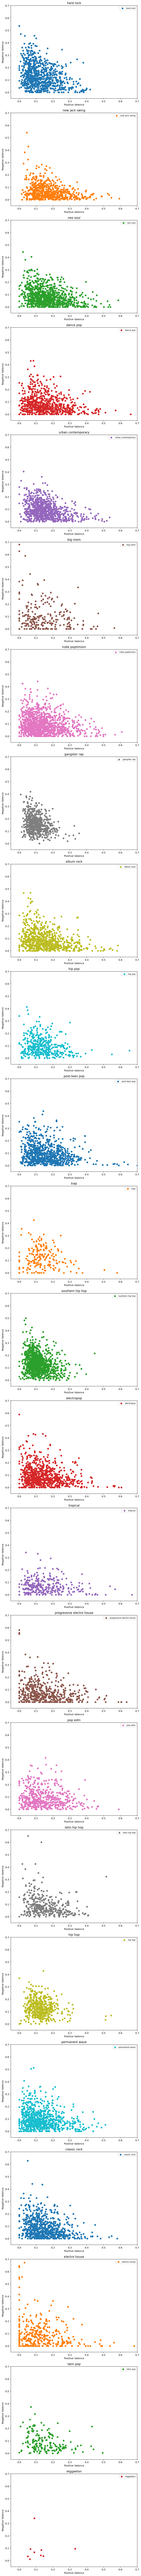

In [48]:
unique_genres = lyrics['playlist_subgenre'].unique()

fig, axs = plt.subplots(len(unique_genres), 1, figsize=(8, 6 * len(unique_genres)))  # Adjust the figure size as needed

# Plot each group on a separate subplot
for i, genre in enumerate(unique_genres):
    group = lyrics[lyrics['playlist_subgenre'] == genre]
    axs[i].scatter(group['positive'], group['negative'], label=genre, color='C'+str(i))  # Use the color palette C0, C1, ..., Cn
    axs[i].set_xlim([-0.05, 0.7])
    axs[i].set_ylim([-0.05, 0.7])
    axs[i].set_title(genre)
    axs[i].set_xlabel('Positive Valence')
    axs[i].set_ylabel('Negative Valence')
    axs[i].legend(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

We can see that songs of every genre tend to have more Negative Valence. However, some generes have relatively more positive valence than others. We can see this in the number of quantity of points that are have more positive valence in each genre's plot. This is key for our analyzation techniques. However, let's also utlized the compound scores for each song in order to also give each song an emotional "mood".

The compound score in VADER is a metric that represents the overall sentiment of a piece of text. It is calculated as a sum of normalized scores of each word in the text, where each word in the text is assigned a sentiment score:

Positive words receive a positive score.
Negative words receive a negative score.
Neutral words receive a score of 0.
These individual word scores are then normalized to a range between -1 and 1.

Finally, the compound score is computed by summing these normalized scores and applying a normalization procedure.

Scores closer to 1 indicate a highly positive sentiment.
Scores closer to -1 indicate a highly negative sentiment.
Scores around 0 indicate a neutral sentiment or a mixture of positive and negative sentiments that roughly cancel each other out.
In summary, the compound score provides a single metric that encapsulates the overall sentiment of a piece of text, taking into account both positive and negative sentiments. It is particularly useful for sentiment analysis tasks where you need to quickly assess the sentiment of a large amount of text.

In [49]:
emotional_scores = lyrics[['playlist_subgenre', 'compound']]
emotional_scores

,playlist_subgenre,compound
1,hard rock,0.987
2,new jack swing,0.982
3,neo soul,0.759
4,dance pop,-0.999
5,urban contemporary,0.955
...,...,...
18448,urban contemporary,-0.956
18449,progressive electro house,0.922
18450,electropop,-0.999
18451,neo soul,0.986


These compound scores are the overall moods of the songs. As described before, songs with compound scores 

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
